### ASTR 3300/ PHYS 5300-003: Astrostatistics
***N. Pol***
___

# Homework 7
### Due: Friday, Apr. 4, at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [2]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

In [16]:
#SETUP
import numpy as np
import astroML
import sklearn
from matplotlib import pyplot as plt


In [ ]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 


fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(___, ___, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(___.flatten(), ___.flatten(), ___, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [4]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

shape is (500, 4) length is 500
[ 7.8948247   2.63234381 80.4253773   1.87575433] [ 0.52366744  0.51621304 47.10411881  2.91421645]
<class 'numpy.ndarray'> 500
7.894824698936446 0.5236674387670526
2.6323438055140835 0.516213039265867


Text(0, 0.5, 'Feature 2')

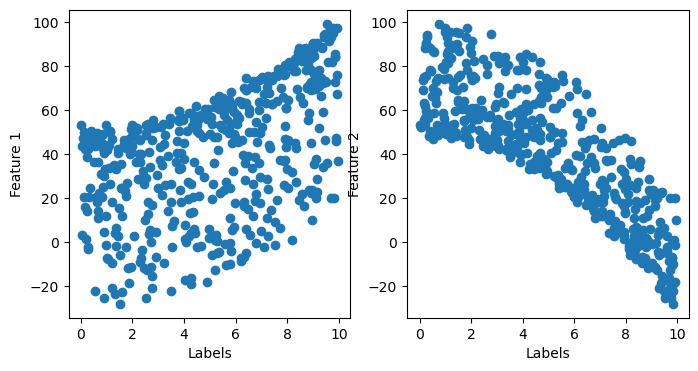

In [34]:
#Part 1

#load and split
stonks = np.load("/Users/katiebarnhart/Documents/hw7_data_1.npy")
feature_1 = []
feature_2 = []
target_labels = []
errors = []

for i in stonks:
    feature_1.append(i[0])
    feature_2.append(i[1])
    target_labels.append(i[2])
    errors.append(i[3])

#hopefully this doesnt cause me a ton of weird aliasing problems. 
#I do this differently every time, dont I. 
feature_1 = np.array(feature_1)
feature_2 = np.array(feature_2)
target_labels = np.array(target_labels)
errors = np.array(errors)

#cut this out before you turn it in, ya goober. 
print("shape is", np.shape(stonks), "length is", len(stonks))
print(stonks[0], stonks[1])
print(type(feature_1), len(feature_1))
print(feature_1[0], feature_1[1])
print(feature_2[0], feature_2[1])


#lets see it
#could think about adding errorbars here if I have time
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax.scatter(feature_1, target_labels)
ax.set_xlabel("Labels")
ax.set_ylabel("Feature 1")
ax = fig.add_subplot(122)
ax.scatter(feature_2, target_labels)
ax.set_xlabel("Labels")
ax.set_ylabel("Feature 2")


[57.10102323  4.94873016 -8.30023407]


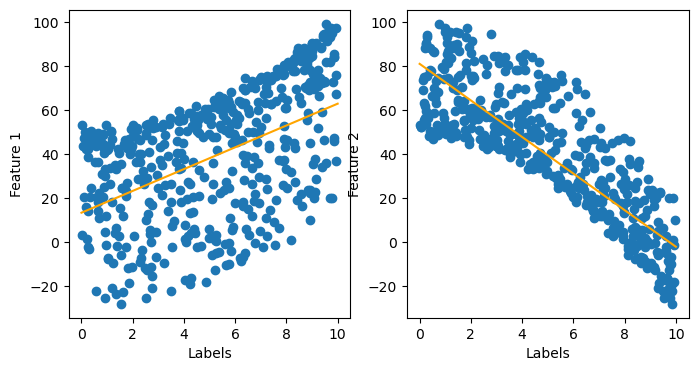

In [53]:
#Part 2 use astroML

#some of this code is from lectures 17 and 18
from astroML.linear_model import LinearRegression

#I'm going to split the data slightly differently
features = []
for i in stonks:
    features.append([i[0], i[1]])

features = np.array(features)

Xtest = features
ytest = target_labels
dytest = errors
model = LinearRegression()
model.fit(Xtest, ytest, dytest)

print(model.coef_) #first one is intercept, second and third are the slopes

xgrid = np.linspace(0, 10, 50)
#The following two lines are an anthony suggestion. 
#I couldn't get this to work with the grids I tried. And I tried several. 
#but this works, and I have no idea why. 
combined_grid = np.column_stack([xgrid, np.median(feature_1) * np.ones_like(xgrid)])
combined_grid2 = np.column_stack([np.median(feature_2) * np.ones_like(xgrid), xgrid])

ypred_1 = model.predict(combined_grid)
ypred_2 = model.predict(combined_grid2)

#plots 
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax.scatter(feature_1, target_labels)
ax.set_xlabel("Labels")
ax.set_ylabel("Feature 1")
ax.plot(xgrid, ypred_1, color="orange")
ax = fig.add_subplot(122)
ax.scatter(feature_2, target_labels)
ax.set_xlabel("Labels")
ax.set_ylabel("Feature 2")
ax.plot(xgrid, ypred_2, color="orange")

This seems like a mediocre fit for the data. 

In [ ]:
#Part 3

ygrid = np.linspace(-30, 100, 50)
x_mesh, y_mesh = np.meshgrid(xgrid, ygrid)
predict_labels = model.predict(x_mesh, y_mesh)

#I dont think this is right, so I havent run it and there are no plots. Maybe Ill get the chance to figure it out later. 

<span style="color:red"> NP: missing 3D plot. -1 pt </span>

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [62]:
#Part 4
#linear model, GridSearchCV the data to get the best Ridge regression 

%matplotlib widget
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV

#modeling
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
model_ridge = Ridge(alpha=0.05) #not sure this is right. It doesnt currently make sense to me.  
ridge_tune = GridSearchCV(model_ridge, ridge_params)
ridge_tune.fit(features, target_labels)

#bestfits
print("The best GridSeachCV Ridge parameters are: ", ridge_tune.best_params_)
print("The best score is: ", ridge_tune.best_score_)

#modeling, RidgeCV
ridge_cv_params = np.array([0.05,0.1,0.2,0.5,1.0])
model_ridge_cv = RidgeCV(alphas = ridge_cv_params)
model_ridge_cv.fit(features, target_labels)
print("And the best RidgeCV alpha is: ", model_ridge_cv.alpha_)

#apologies for no plots. The interactive plotting confused me and I was spending too much time fiddling with that 
#instead of learning how to do these regression methods

The best GridSeachCV Ridge parameters are:  {'alpha': 1.0, 'solver': 'svd'}
The best score is:  0.9290800590702192
And the best RidgeCV alpha is:  1.0


Which does agree with the GridSearchCV, but I feel like we tested a fairly narrow range of values for alpha here.

<span style="color:red"> NP: missing plots? -1 pt </span>

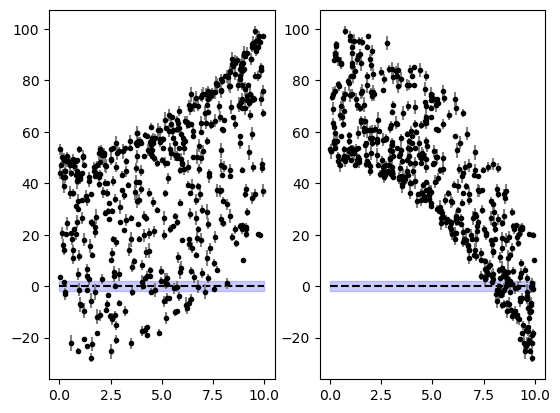

In [70]:
#Part 5
%matplotlib inline
from sklearn.gaussian_process import GaussianProcessRegressor

#note to self from the documentation: the default kernel is none, which appears to be a constant * RBF
#and all of that is optimized during fitting

#no errors
gpr1 = GaussianProcessRegressor(kernel=None, n_restarts_optimizer=5)
gpr1.fit = (features, target_labels)
y_pred_gpr1, sigma = gpr1.predict(combined_grid, return_std=True)

#with errors
gpr2 = GaussianProcessRegressor(kernel=None, alpha=(errors / target_labels) ** 2, n_restarts_optimizer=5) #this was in lecture 18 as well
gpr2.fit = (features, target_labels)
y_pred_gpr2, sigma = gpr2.predict(combined_grid2, return_std=True)

# I think I'm skipping a step here. A bunch of reading about this on scikitlearn website helped, but I'm obviously not there yet. 

#plots
fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(xgrid, y_pred_gpr1, '--k')
ax.errorbar(feature_1, target_labels, errors, fmt='.k', ecolor='gray', markersize=6)
ax.fill_between(xgrid, y_pred_gpr1 - 1.96 * sigma, y_pred_gpr1 + 1.96 * sigma, alpha=0.2, color='b')
ax = fig.add_subplot(122)
ax.plot(xgrid, y_pred_gpr2, '--k')
ax.errorbar(feature_2, target_labels, errors, fmt='.k', ecolor='gray', markersize=6)
ax.fill_between(xgrid, y_pred_gpr2 - 1.96 * sigma, y_pred_gpr2 + 1.96 * sigma, alpha=0.2, color='b')

<span style="color:red"> NP: missing 3D plots. -1 pt </span>

AttributeError: 'numpy.ndarray' object has no attribute 'coef_'

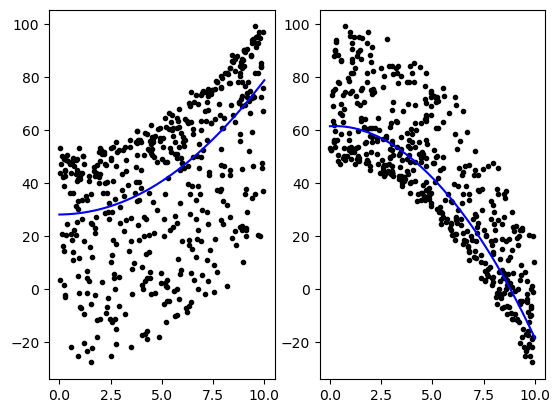

In [84]:
#Part 6
#polynomial fitting
from astroML.linear_model import PolynomialRegression

quartic_model = PolynomialRegression(4)
quartic_model.fit(features, target_labels)
quartic_predicted = quartic_model.predict(combined_grid)
quartic_predicted2 = quartic_model.predict(combined_grid2)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(xgrid, quartic_predicted, color="b")
ax.scatter(feature_1, target_labels, marker=".", color="black")
ax = fig.add_subplot(122)
ax.plot(xgrid, quartic_predicted2, color="b")
ax.scatter(feature_2, target_labels, marker=".", color="black")

print(quartic_predicted.coef_)
print(quartic_predicted2.coef_)
#apparently thats the wrong call for that. 
#I keep getting suggested to define the model in a completely different way and I don't trust that since we were specifically asked to use
#polynomial regression here. Use PolynomialFeatures?
#what is the syntax for this?

<span style="color:red"> NP: missing 3D plot. -1 pt. Also, you are correctly using PolynomialRegression, you just need to call the fitter to get the coefficients, etc. </span>

So far, this is a lot better than the linear model

In [ ]:
#part 7

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(feature_1, target_labels, errors, test_size=0.2)

#out of time. 

<span style="color:red"> NP: -3 pts </span>